In [ ]:
import display
import hopfield_net
import read_csv
import numpy as np

np.random.seed(0)

In [11]:
CONST_ACTIVATION_FUNCTIONS = ['signum', 'heavy_side']
CONST_DYNAMICS_TYPE = ['asynchronous', 'synchronous']

In [12]:
datasets = ["animals-14x9.csv",
                "large-25x25.csv",
                "large-25x50.csv",
                "letters-14x20.csv",
                "letters-abc-8x12.csv",
                "OCRA-12x30-cut.csv",
                "small-7x7.csv"]

In [13]:
train, dims = read_csv.read_patterns('./../data/hopfield/' + datasets[1])
num_of_patterns = train.shape[0]

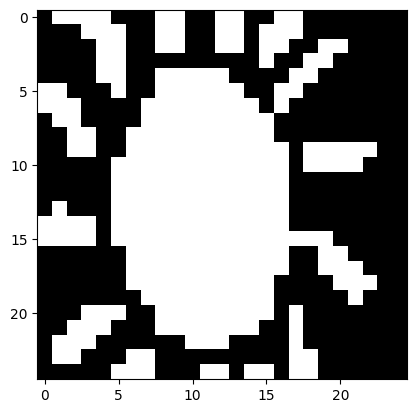

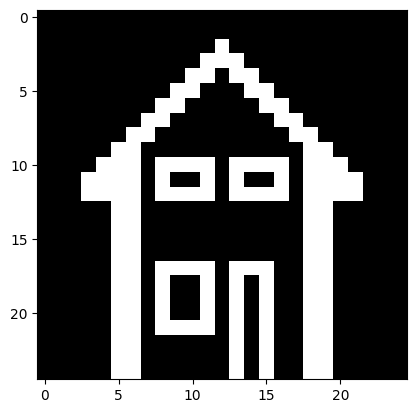

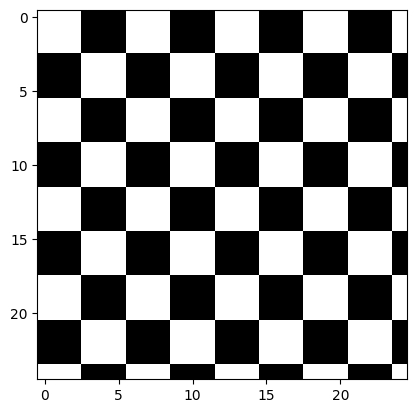

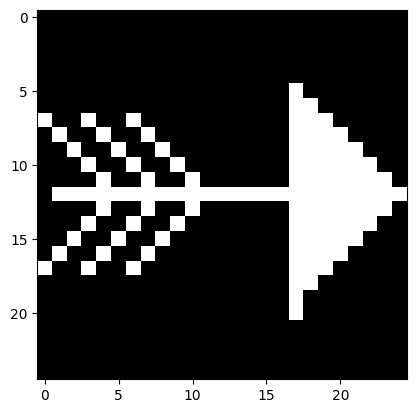

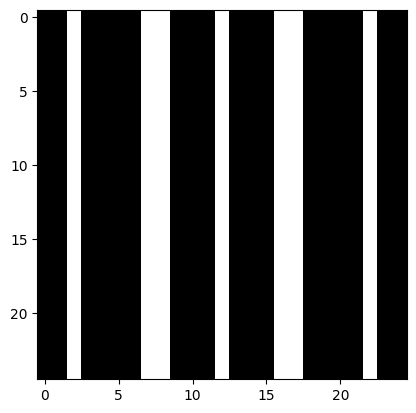

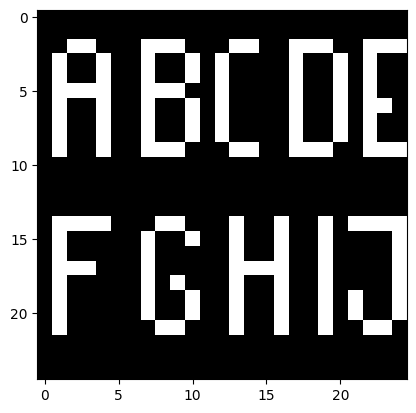

In [14]:
# save training data as .png
for i in range(num_of_patterns):
    display.save_img(train[i], dims, "./../data/hopfield/train/p" + str(i+1) + ".png")

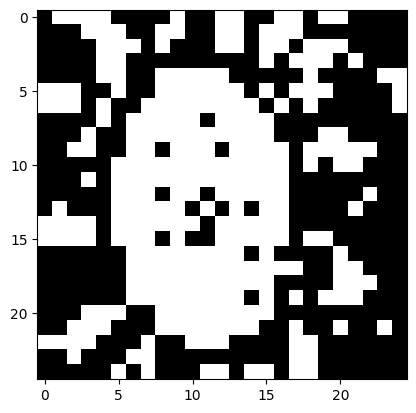

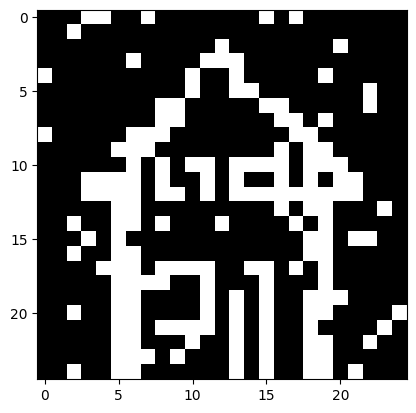

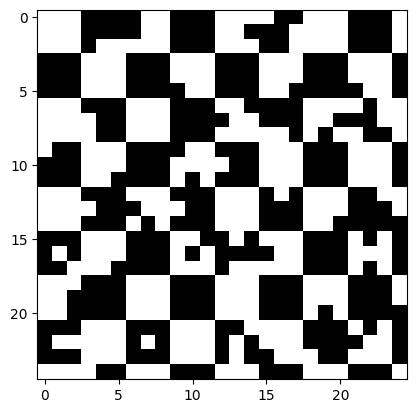

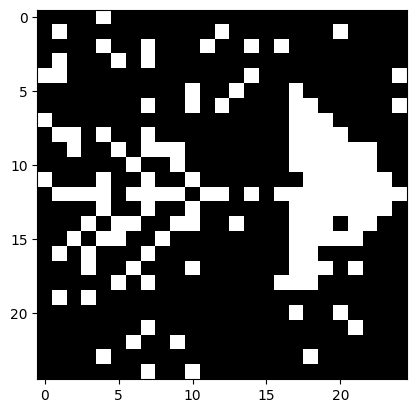

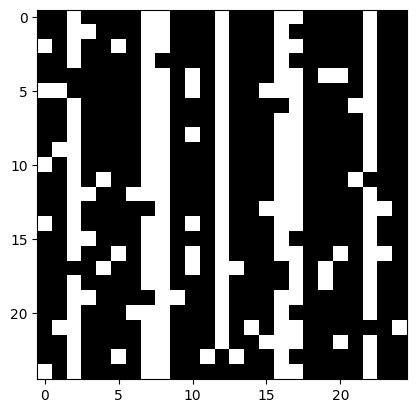

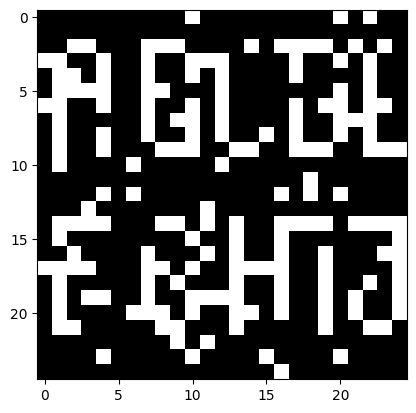

In [15]:
# save noise data as .png
X = []
for i in range(num_of_patterns):
    X.append(read_csv.noise(train[i], 0.1))
    display.save_img(X[-1], dims, "./../data/hopfield/noise/n" + str(i+1) + ".png")

In [16]:
n = dims[0] * dims[1]
# activation function 0 - signum, 1 - heaviside
activation = 0
# dynamics type 0 - asynchronous, 1 - synchronous
dynamics = 0

In [17]:
HN = hopfield_net.HopfieldNet(
        n = n,
        activation = CONST_ACTIVATION_FUNCTIONS[activation],
        dynamics = CONST_DYNAMICS_TYPE[dynamics]
    )

Convergence reached in epoch:  1
Convergence reached in epoch:  3
Convergence reached in epoch:  1
Convergence reached in epoch:  1
Convergence reached in epoch:  1
Convergence reached in epoch:  1


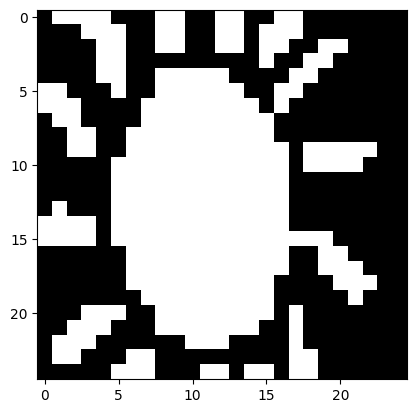

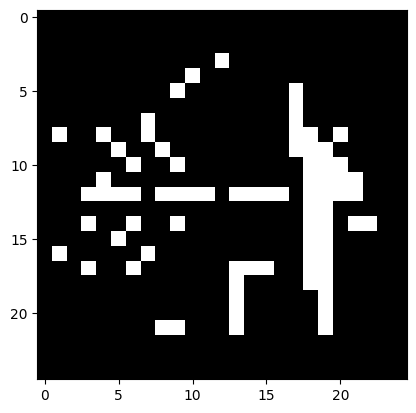

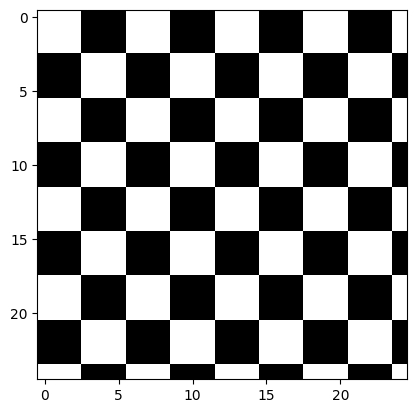

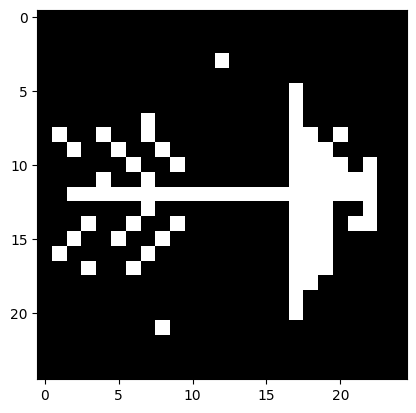

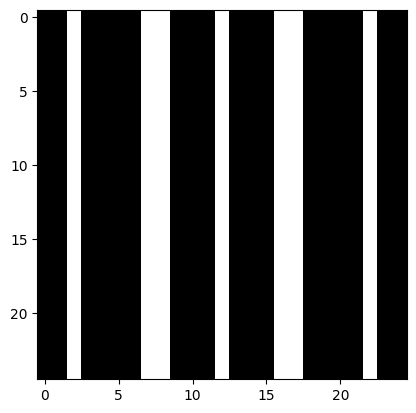

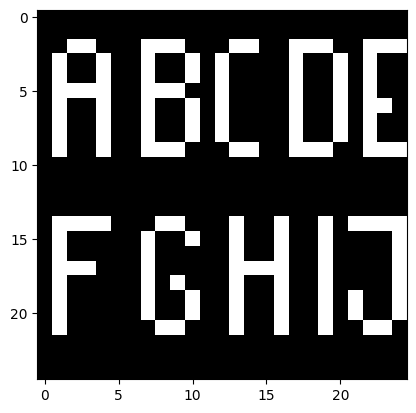

In [18]:
HN.HEBB_training(train)
for i in range(num_of_patterns):
    last_x = HN.forward(dims, init_x = X[i], animation = False)
    display.save_img(last_x, dims, "./../data/hopfield/hebb/h" + str(i+1) + ".png")

In [19]:
HN2 = hopfield_net.HopfieldNet(
    n = n,
    activation = CONST_ACTIVATION_FUNCTIONS[activation],
    dynamics = CONST_DYNAMICS_TYPE[dynamics]
)


6
Oja epoch # 1
row:  [0.6666667  0.33333334 0.         0.6666667  0.6666667  0.        ]
Oja epoch # 2
row:  [0.54791594 0.28383723 0.00092964 0.56850576 0.56834    0.        ]
Oja epoch # 3
row:  [0.47934392 0.2536235  0.00168804 0.50801975 0.5077297  0.        ]
Oja epoch # 4
row:  [0.4328382  0.23246145 0.00234155 0.46537492 0.4649933  0.        ]
Oja epoch # 5
row:  [0.39847577 0.2164836  0.00292241 0.4330086  0.43255764 0.        ]
Oja epoch # 6
row:  [0.37168053 0.20382781 0.00344924 0.40725818 0.4067533  0.        ]
Oja epoch # 7
row:  [0.3499942  0.1934625  0.00393394 0.38608545 0.38553768 0.        ]
Oja epoch # 8
row:  [0.33195677 0.18476036 0.00438465 0.3682466  0.36766413 0.        ]
Oja epoch # 9
row:  [0.3166368  0.1773136  0.00480724 0.35293067 0.3523197  0.        ]
Oja epoch # 10
row:  [0.30340722 0.1708434  0.00520608 0.3395818  0.3389471  0.        ]
Oja epoch # 11
row:  [0.29182783 0.16515145 0.00558454 0.32780367 0.32714906 0.        ]
Oja epoch # 12
row:  [0.2815

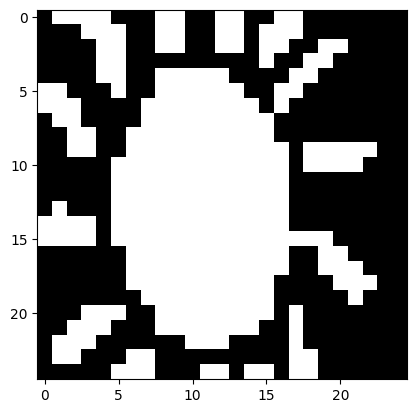

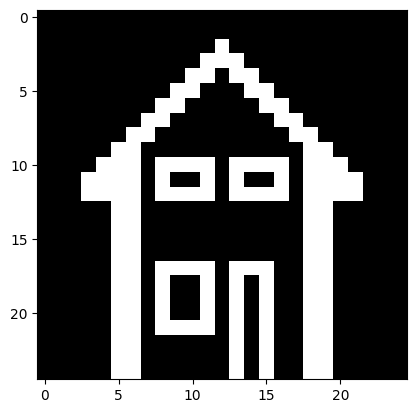

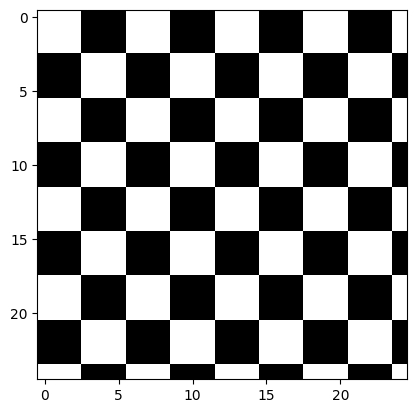

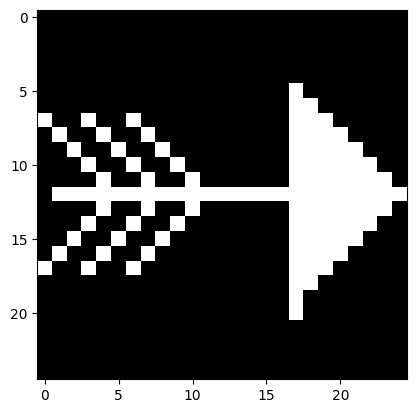

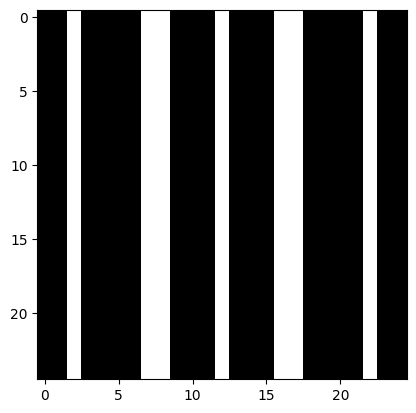

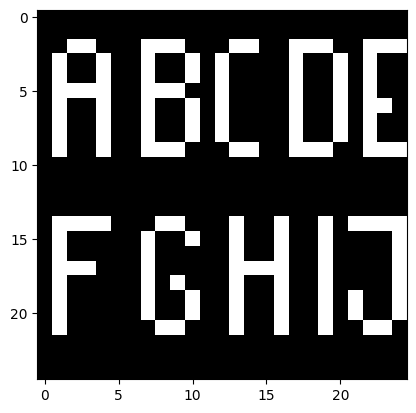

In [20]:
HN2.OJA_training(train, 30, eta=0.00001)
for i in range(num_of_patterns):
    #wait = input()
    last_x = HN2.forward(dims, init_x = X[i], animation = False)
    display.save_img(last_x, dims, "./../data/hopfield/oja/o" + str(i+1) + ".png")
    #wait = input()
    #last_x = HN.forward(dims, init_x = last_x, epochs = 10, animation = False)
    #display.save_img(last_x, dims, "../test/oja/o" + str(i+1) + ".png")